# Ceneo Analyzer

## Biblioteki

In [298]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Lista kodów wszystkich produktów, o których zostały pobrane dane

In [299]:
print(*[fname.split('.')[0] for fname in os.listdir('opinions')], sep='\n')

102252763
94103927
test


## Kod produktu, dla którego ma zosstać wykonana analiza opinni

In [300]:
product_id = input('Podaj kod prodktu w serwisie Ceneo.pl: ')
#94103927

## Wczytanie do obiektu pandas.DataFrame opinii o wskazanym produkcie

In [301]:
opinions = pd.read_json(f"opinions/{product_id}.json")

In [302]:
opinions

,opinion_id,author,recommendation,rating,content,pros,cons,useful,useless,publish_date,purchase_date
0,14882855,m...3,Polecam,5/5,"Produkt odpowiada opisowi. Duża moc, bardzo pr...",[],[],0,0,2021-08-25 13:00:36,2021-08-20 15:50:05
1,17644198,t...v,Polecam,5/5,w pełni spełnia moje oczekiwania. Doskonały st...,[solidny],[],0,0,2023-06-24 11:40:45,2023-06-13 20:20:29
2,18297317,k...g,Polecam,5/5,Super!,[],[],0,0,2024-01-12 10:01:44,2024-01-01 22:12:28
3,17032079,Robert,Polecam,4/5,"Uważam, że jakość wykonania jest na bardzo dob...",[],[],0,0,2023-01-18 14:16:37,2023-01-15 21:00:55
4,16845664,m...7,Polecam,5/5,Produkt zgodny z opisem i estetycznie wykonany...,[],[],0,0,2022-12-07 18:48:09,2022-12-03 11:04:50
...,...,...,...,...,...,...,...,...,...,...,...
182,13948675,z...5,Polecam,5/5,Ok,[],[],0,0,2021-02-12 20:35:33,2021-02-02 20:22:27
183,17953583,l...9,Nie polecam,"0,5/5","Dobre urządzenie jako blender ,trochę ciężki a...",[solidny],[],0,0,2023-09-29 16:58:11,2023-09-19 08:22:30
184,17867933,j...k,Nie polecam,"0,5/5",Nie załącza się do zgłoszenia reklamacji\nWygl...,[],[],0,0,2023-09-04 16:17:18,2023-08-28 22:01:25
185,17718528,m...2,Nie polecam,"0,5/5",był uszkodzony,[],[],0,0,2023-07-18 21:13:37,2023-06-29 15:07:16


## Przekształcanie danych

In [303]:
opinions.rating = opinions.rating.apply(lambda rate: rate.split('/')[0].replace(',', '.')).astype(float)

## Podastwowe statystyki

In [304]:
opinions_count = len(opinions)
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
avg_rating = opinions.rating.mean()
# print(avg_rating)

## Histogram częstości poszczególnych ocen w opiniach o produkcie

[Text(0, 0, ''),
 Text(0, 0, '3'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, '2'),
 Text(0, 0, '13'),
 Text(0, 0, '19'),
 Text(0, 0, '149')]

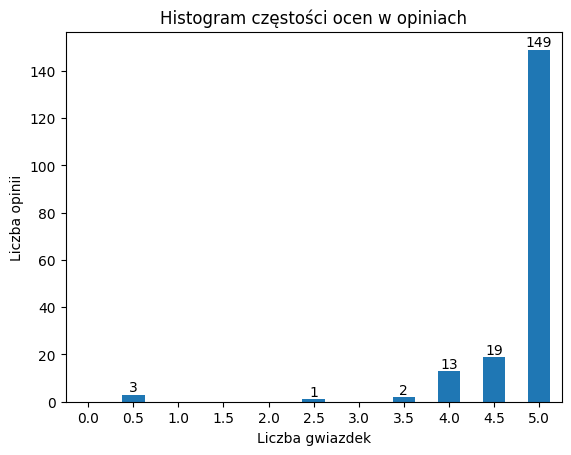

In [305]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.2,0.5), fill_value = 0)
# print(rating_distribution)
fig, ax = plt.subplots()
rating_distribution.plot.bar()
plt.xticks(rotation = 0)
plt.xlabel('Liczba gwiazdek')
plt.ylabel('Liczba opinii')
plt.title('Histogram częstości ocen w opiniach')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: int(x) if x > 0 else '')

## Udział poszczególnych rekomendacji w opiniach

Text(0.5, 1.0, 'Udział rekomendacji w opiniach')

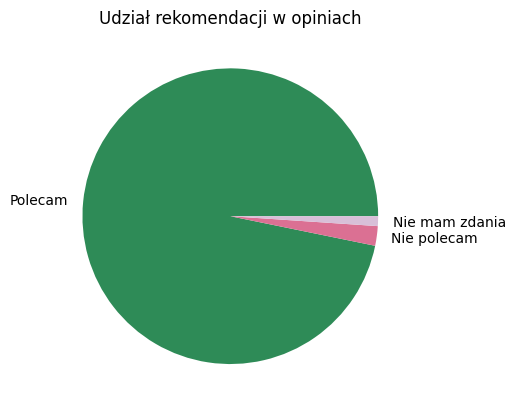

In [306]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex(['Polecam', 'Nie polecam', None])
recommendation_distribution.plot.pie(
    label = '',
    colors = ['seagreen', 'palevioletred', 'thistle'],
    labels = ['Polecam', 'Nie polecam', 'Nie mam zdania']
)
plt.title('Udział rekomendacji w opiniach')